<a href="https://colab.research.google.com/github/XGHouFTW/ISEF-2022/blob/main/LSTMPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install ipdb
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Mount Google Drive

from google.colab import drive

# For use in a terminal interface

import sys

In [ ]:
# Load our dataset 
# Note it should be in same dir

filepath = '/content/MyDrive/MyDrive/MergedPriceData.csv'
drive.mount('/content/MyDrive')
maindf=pd.read_csv(filepath)

# script, filepath, currencies = sys.argv
# currencies = currencies.split()



Mounted at /content/MyDrive


In [ ]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  734
Total number of fields present in the dataset:  78


In [ ]:
maindf.shape

(734, 78)

In [ ]:
maindf.head()

,index,Date,BTC_Open,BTC_Close,BTC_Volume,BTC_change_factor,ETH_Open,ETH_Close,ETH_Volume,ETH_change_factor,DOGE_Open,DOGE_Close,DOGE_Volume,DOGE_change_factor,btc_newsPosScoreaverage,btc_newsNegScoreaverage,btc_newsComScoreaverage,btc_newsScorecount,eth_newsPosScoreaverage,eth_newsNegScoreaverage,eth_newsComScoreaverage,eth_newsScorecount,doge_newsPosScoreaverage,doge_newsNegScoreaverage,doge_newsComScoreaverage,doge_newsScorecount,cryptocurrency_newsPosScoreaverage,cryptocurrency_newsNegScoreaverage,cryptocurrency_newsComScoreaverage,cryptocurrency_newsScorecount,economy_newsPosScoreaverage,economy_newsNegScoreaverage,economy_newsComScoreaverage,economy_newsScorecount,finance_newsPosScoreaverage,finance_newsNegScoreaverage,finance_newsComScoreaverage,finance_newsScorecount,politics_newsPosScoreaverage,politics_newsNegScoreaverage,politics_newsComScoreaverage,politics_newsScorecount,pandemic_newsPosScoreaverage,pandemic_newsNegScoreaverage,pandemic_newsComScoreaverage,pandemic_newsScorecount,btc_redditPosScoreaverage,btc_redditNegScoreaverage,btc_redditComScoreaverage,btc_redditScorecount,eth_redditPosScoreaverage,eth_redditNegScoreaverage,eth_redditComScoreaverage,eth_redditScorecount,doge_redditPosScoreaverage,doge_redditNegScoreaverage,doge_redditComScoreaverage,doge_redditScorecount,cryptocurrency_redditPosScoreaverage,cryptocurrency_redditNegScoreaverage,cryptocurrency_redditComScoreaverage,cryptocurrency_redditScorecount,economy_redditPosScoreaverage,economy_redditNegScoreaverage,economy_redditComScoreaverage,economy_redditScorecount,finance_redditPosScoreaverage,finance_redditNegScoreaverage,finance_redditComScoreaverage,finance_redditScorecount,politics_redditPosScoreaverage,politics_redditNegScoreaverage,politics_redditComScoreaverage,politics_redditScorecount,pandemic_redditPosScoreaverage,pandemic_redditNegScoreaverage,pandemic_redditComScoreaverage,pandemic_redditScorecount
0,0.0,2020-01-31 0:00:00,9508.313477,9350.529297,29432489719,0.983406,184.736908,180.160172,11728616394,0.975226,0.002440,0.002394,76519295,0.981148,0.107909,0.074000,0.126964,11,0.068700,0.021300,0.09769,10,0.0,0.0,0.0,0,0.140000,0.052125,0.189825,8,0.110514,0.073429,0.105009,35,0.031625,0.028375,-0.024538,8,0.069379,0.061897,0.012179,29,0.025357,0.071571,-0.099750,14,0.09135,0.06302,0.222978,100,0.09237,0.03938,0.361353,100,0.116840,0.044750,0.196060,100,0.10144,0.01847,0.365265,100,0.09368,0.097430,-0.038626,100,0.098590,0.057240,0.274926,100,0.10798,0.09278,0.036941,100,0.09918,0.08868,0.015407,100
1,1.0,2020-02-01 0:00:00,9346.357422,9392.875000,25922656496,1.004977,180.113770,183.673950,11569697182,1.019766,0.002391,0.002422,78730830,1.012965,0.036500,0.095000,-0.125188,8,0.080200,0.072400,-0.02262,5,0.0,0.0,0.0,0,0.057857,0.082000,-0.043557,7,0.058800,0.106667,-0.132360,15,0.074067,0.031600,0.086823,30,0.066429,0.063857,0.026850,14,0.000000,0.000000,0.000000,2,0.10410,0.04672,0.305372,100,0.09728,0.02979,0.319943,100,0.123939,0.035697,0.357381,99,0.06621,0.04271,0.144001,100,0.11307,0.102250,0.044050,100,0.110343,0.044788,0.416939,99,0.09337,0.09603,-0.021826,100,0.10269,0.08586,0.097857,100
2,2.0,2020-02-02 0:00:00,9389.820313,9344.365234,30835736946,0.995159,183.532501,188.617538,14054425389,1.027706,0.002421,0.002468,91552515,1.019413,0.107300,0.055000,0.049160,10,0.000000,0.000000,0.00000,3,0.0,0.0,0.0,0,0.026286,0.000000,0.028900,7,0.102857,0.105429,-0.081043,7,0.080417,0.025500,0.106442,12,0.068867,0.087000,-0.066660,15,0.046250,0.037250,0.022000,4,0.10940,0.04000,0.342775,100,0.05174,0.02404,0.181080,100,0.141859,0.037778,0.335710,99,0.06663,0.04317,0.157170,100,0.10108,0.086650,0.098146,100,0.109350,0.052070,0.388530,100,0.10146,0.09387,0.043068,100,0.09618,0.11241,0.020461,100
3,3.0,2020-02-03 0:00:00,9344.683594,9293.521484,30934096509,0.994525,188.607407,189.865067,12392875241,1.006668,0.002466,0.002440,78856631,0.989457,0.082125,0.062708,0.033429,24,0.043000,0.129250,-0.17995,8,0.0,0.0,0.0,0,0.030818,0.094364,-0.164345,11,0.0

In [ ]:
maindf.tail()

,index,Date,BTC_Open,BTC_Close,BTC_Volume,BTC_change_factor,ETH_Open,ETH_Close,ETH_Volume,ETH_change_factor,DOGE_Open,DOGE_Close,DOGE_Volume,DOGE_change_factor,btc_newsPosScoreaverage,btc_newsNegScoreaverage,btc_newsComScoreaverage,btc_newsScorecount,eth_newsPosScoreaverage,eth_newsNegScoreaverage,eth_newsComScoreaverage,eth_newsScorecount,doge_newsPosScoreaverage,doge_newsNegScoreaverage,doge_newsComScoreaverage,doge_newsScorecount,cryptocurrency_newsPosScoreaverage,cryptocurrency_newsNegScoreaverage,cryptocurrency_newsComScoreaverage,cryptocurrency_newsScorecount,economy_newsPosScoreaverage,economy_newsNegScoreaverage,economy_newsComScoreaverage,economy_newsScorecount,finance_newsPosScoreaverage,finance_newsNegScoreaverage,finance_newsComScoreaverage,finance_newsScorecount,politics_newsPosScoreaverage,politics_newsNegScoreaverage,politics_newsComScoreaverage,politics_newsScorecount,pandemic_newsPosScoreaverage,pandemic_newsNegScoreaverage,pandemic_newsComScoreaverage,pandemic_newsScorecount,btc_redditPosScoreaverage,btc_redditNegScoreaverage,btc_redditComScoreaverage,btc_redditScorecount,eth_redditPosScoreaverage,eth_redditNegScoreaverage,eth_redditComScoreaverage,eth_redditScorecount,doge_redditPosScoreaverage,doge_redditNegScoreaverage,doge_redditComScoreaverage,doge_redditScorecount,cryptocurrency_redditPosScoreaverage,cryptocurrency_redditNegScoreaverage,cryptocurrency_redditComScoreaverage,cryptocurrency_redditScorecount,economy_redditPosScoreaverage,economy_redditNegScoreaverage,economy_redditComScoreaverage,economy_redditScorecount,finance_redditPosScoreaverage,finance_redditNegScoreaverage,finance_redditComScoreaverage,finance_redditScorecount,politics_redditPosScoreaverage,politics_redditNegScoreaverage,politics_redditComScoreaverage,politics_redditScorecount,pandemic_redditPosScoreaverage,pandemic_redditNegScoreaverage,pandemic_redditComScoreaverage,pandemic_redditScorecount
729,729.0,2022-01-29 0:00:00,37780.71484,38138.17969,17194183075,1.009462,2546.590576,2597.084717,11172062661,1.019828,0.141649,0.143056,397610776,1.009933,0.073101,0.067232,0.018658,69,0.075367,0.061233,0.050010,30,0.047130,0.053522,-0.019691,23,0.068814,0.060804,0.013754,97,0.072157,0.033118,0.075388,51,0.077605,0.044116,0.080726,86,0.063930,0.060744,0.008865,86,0.070263,0.059562,0.021816,80,0.09919,0.05994,0.316962,100,0.12692,0.04654,0.434472,100,0.09025,0.020458,0.337987,24,0.092222,0.056131,0.304656,99,0.11896,0.09560,0.125163,100,0.10575,0.06810,0.281294,100,0.10127,0.08605,0.106361,100,0.08244,0.10300,-0.193735,100
730,730.0,2022-01-30 0:00:00,38151.91797,37917.60156,14643548444,0.993858,2598.564941,2603.466553,9501221177,1.001886,0.143057,0.139471,363976741,0.974933,0.045603,0.054590,-0.030813,78,0.048000,0.068810,-0.062767,42,0.086333,0.030250,0.114846,24,0.058659,0.062965,-0.022180,85,0.089500,0.041000,0.114959,74,0.083927,0.048366,0.073311,82,0.067832,0.076032,-0.014314,95,0.061520,0.070500,-0.013114,100,0.11753,0.06539,0.282042,100,0.11184,0.04074,0.420474,100,0.11300,0.076208,0.197179,24,0.117540,0.053420,0.435340,100,0.11155,0.08615,0.109001,100,0.09831,0.06197,0.279423,100,0.07924,0.09492,0.002579,100,0.10271,0.10172,-0.063150,100
731,731.0,2022-01-31 0:00:00,37920.28125,38483.12500,20734730465,1.014843,2603.263428,2688.278809,13778234614,1.032657,0.139469,0.141805,412307174,1.016749,0.052292,0.033792,0.035662,24,0.029222,0.052833,-0.064144,18,0.061462,0.055154,-0.034246,13,0.045846,0.085769,-0.054254,26,0.076234,0.054404,0.061985,47,0.071944,0.008528,0.153942,36,0.042000,0.059444,-0.021067,27,0.055808,0.079692,-0.057265,26,0.10199,0.05578,0.248514,100,0.09789,0.05347,0.377277,100,0.10856,0.037400,0.311984,25,0.107830,0.053530,0.394858,100,0.09787,0.08270,0.118918,100,0.09128,0.06196,0.223877,100,0.10671,0.09149,0.127505,100,0.09691,0.10670,-0.213607,100
732,NaN,NaN,0.00000,0.00000,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.00

In [ ]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 78 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 732 non-null    float64
 1   Date                                  732 non-null    object 
 2   BTC_Open                              734 non-null    float64
 3   BTC_Close                             734 non-null    float64
 4   BTC_Volume                            734 non-null    int64  
 5   BTC_change_factor                     734 non-null    float64
 6   ETH_Open                              734 non-null    float64
 7   ETH_Close                             734 non-null    float64
 8   ETH_Volume                            734 non-null    int64  
 9   ETH_change_factor                     734 non-null    float64
 10  DOGE_Open                             734 non-null    float64
 11  DOGE_Close         

In [ ]:
maindf.describe()

,index,BTC_Open,BTC_Close,BTC_Volume,BTC_change_factor,ETH_Open,ETH_Close,ETH_Volume,ETH_change_factor,DOGE_Open,DOGE_Close,DOGE_Volume,DOGE_change_factor,btc_newsPosScoreaverage,btc_newsNegScoreaverage,btc_newsComScoreaverage,btc_newsScorecount,eth_newsPosScoreaverage,eth_newsNegScoreaverage,eth_newsComScoreaverage,eth_newsScorecount,doge_newsPosScoreaverage,doge_newsNegScoreaverage,doge_newsComScoreaverage,doge_newsScorecount,cryptocurrency_newsPosScoreaverage,cryptocurrency_newsNegScoreaverage,cryptocurrency_newsComScoreaverage,cryptocurrency_newsScorecount,economy_newsPosScoreaverage,economy_newsNegScoreaverage,economy_newsComScoreaverage,economy_newsScorecount,finance_newsPosScoreaverage,finance_newsNegScoreaverage,finance_newsComScoreaverage,finance_newsScorecount,politics_newsPosScoreaverage,politics_newsNegScoreaverage,politics_newsComScoreaverage,politics_newsScorecount,pandemic_newsPosScoreaverage,pandemic_newsNegScoreaverage,pandemic_newsComScoreaverage,pandemic_newsScorecount,btc_redditPosScoreaverage,btc_redditNegScoreaverage,btc_redditComScoreaverage,btc_redditScorecount,eth_redditPosScoreaverage,eth_redditNegScoreaverage,eth_redditComScoreaverage,eth_redditScorecount,doge_redditPosScoreaverage,doge_redditNegScoreaverage,doge_redditComScoreaverage,doge_redditScorecount,cryptocurrency_redditPosScoreaverage,cryptocurrency_redditNegScoreaverage,cryptocurrency_redditComScoreaverage,cryptocurrency_redditScorecount,economy_redditPosScoreaverage,economy_redditNegScoreaverage,economy_redditComScoreaverage,economy_redditScorecount,finance_redditPosScoreaverage,finance_redditNegScoreaverage,finance_redditComScoreaverage,finance_redditScorecount,politics_redditPosScoreaverage,politics_redditNegScoreaverage,politics_redditComScoreaverage,politics_redditScorecount,pandemic_redditPosScoreaverage,pandemic_redditNegScoreaverage,pandemic_redditComScoreaverage,pandemic_redditScorecount
count,732.000000,734.000000,734.000000,7.340000e+02,734.000000,734.000000,734.000000,7.340000e+02,734.000000,734.000000,734.000000,7.340000e+02,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,365.500000,30493.988401,30527.118267,4.005300e+10,0.999863,1654.653146,1657.586251,2.090754e+10,1.002238,0.109461,0.109675,2.168185e+09,1.009055,0.061305,0.058204,0.004516,22.250681,0.064124,0.043107,0.041390,15.228883,0.053862,0.035180,0.044270,6.844687,0.067306,0.057331,0.016355,23.839237,0.073862,0.066752,0.014843,31.510899,0.073929,0.045778,0.059541,29.464578,0.056340,0.073328,-0.038253,32.344687,0.054147,0.074111,-0.043105,31.566757,0.099515,0.054667,0.239553,93.989101,0.101489,0.042192,0.328443,95.407357,0.109985,0.042622,0.253109,66.104905,0.094832,0.038564,0.316900,88.181199,0.101103,0.087855,0.080289,96.407357,0.099968,0.053745,0.298438,96.314714,0.098869,0.092221,0.019550,96.423706,0.096432,0.084640,0.068267,96.460490
std,211.454487,19384.311370,19364.115439,2.072152e+10,0.065765,1440.984015,1439.594120,1.107337e+10,0.074537,0.133499,0.133550,5.284754e+09,0.168223,0.023367,0.027325,0.081170,16.599687,0.035728,0.033103,0.110219,15.213243,0.067158,0.054410,0.183585,12.738652,0.026111,0.029210,0.087879,19.360831,0.026236,0.029342,0.094208,20.684316,0.035967,0.030567,0.109203,22.016569,0.021255,0.024258,0.076209,19.666309,0.021703,0.028039,0.081106,20.780679,0.022653,0.014241,0.103695,19.875050,0

In [ ]:
maindf.columns

Index(['index', 'Date', 'BTC_Open', 'BTC_Close', 'BTC_Volume',
       'BTC_change_factor', 'ETH_Open', 'ETH_Close', 'ETH_Volume',
       'ETH_change_factor', 'DOGE_Open', 'DOGE_Close', 'DOGE_Volume',
       'DOGE_change_factor', 'btc_newsPosScoreaverage',
       'btc_newsNegScoreaverage', 'btc_newsComScoreaverage',
       'btc_newsScorecount', 'eth_newsPosScoreaverage',
       'eth_newsNegScoreaverage', 'eth_newsComScoreaverage',
       'eth_newsScorecount', 'doge_newsPosScoreaverage',
       'doge_newsNegScoreaverage', 'doge_newsComScoreaverage',
       'doge_newsScorecount', 'cryptocurrency_newsPosScoreaverage',
       'cryptocurrency_newsNegScoreaverage',
       'cryptocurrency_newsComScoreaverage', 'cryptocurrency_newsScorecount',
       'economy_newsPosScoreaverage', 'economy_newsNegScoreaverage',
       'economy_newsComScoreaverage', 'economy_newsScorecount',
       'finance_newsPosScoreaverage', 'finance_newsNegScoreaverage',
       'finance_newsComScoreaverage', 'finance_newsSc

In [ ]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 4


In [ ]:
print('NA values:',maindf.isnull().values.any())

NA values: True


In [ ]:
# If dataset had null values we can use this code to drop all the null values present in the dataset

maindf = maindf.dropna(subset=["Date"])
# print('Null Values:',maindf.isnull().values.sum())
# print('NA values:',maindf.isnull().values.any())

In [ ]:
# Final shape of the dataset after dealing with null values 

maindf.shape

(732, 78)

In [ ]:
# Printing the start date and End date of the dataset

sd=maindf.iloc[0]["Date"]
ed=maindf.iloc[-1]["Date"]


print('Starting Date',sd)
print('Ending Date',ed)


Starting Date 2020-01-31 0:00:00
Ending Date 2022-01-31 0:00:00


In [ ]:
# Lets First Take all the Close Price 
closedf = maindf[['Date','BTC_Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (732, 2)


In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.BTC_Close, labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2020-2022', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
closedf = closedf[closedf['Date'] > '2021-01-31']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  366


In [ ]:
closedf

,Date,BTC_Close
366,2021-01-31 0:00:00,33114.35938
367,2021-02-01 0:00:00,33537.17578
368,2021-02-02 0:00:00,35510.28906
369,2021-02-03 0:00:00,37472.08984
370,2021-02-04 0:00:00,36926.06641
...,...,...
727,2022-01-27 0:00:00,37138.23438
728,2022-01-28 0:00:00,37784.33203
729,2022-01-29 0:00:00,38138.17969
730,2022-01-30 0:00:00,37917.60156


In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.BTC_Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

* ### Normalizing Data
- Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.
- MinMaxScaler. For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.

In [ ]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(366, 1)


In [ ]:
closedf

array([[0.08758096],
       [0.09877859],
       [0.15103337],
       [0.20298855],
       [0.18852798],
       [0.2207912 ],
       [0.25049773],
       [0.24089563],
       [0.4340398 ],
       [0.44157805],
       [0.40018654],
       [0.47940237],
       [0.46869034],
       [0.45811456],
       [0.50079983],
       [0.48034853],
       [0.51358025],
       [0.59168346],
       [0.57925715],
       [0.69070826],
       [0.6963065 ],
       [0.7344539 ],
       [0.64619461],
       [0.50363718],
       [0.52696658],
       [0.45780566],
       [0.43783479],
       [0.43382762],
       [0.40600193],
       [0.52500443],
       [0.49184047],
       [0.54902489],
       [0.49666521],
       [0.50636176],
       [0.50596658],
       [0.56672771],
       [0.59426601],
       [0.6625295 ],
       [0.69389734],
       [0.74147666],
       [0.72894918],
       [0.83252571],
       [0.7811275 ],
       [0.69121321],
       [0.71498745],
       [0.76970198],
       [0.74290149],
       [0.755

* ### Now we Transform the Close price based on Time-series-analysis forecasting requirement , Here we will take 15   

In [ ]:
# convert an array of values into a dataset matrix

def create_dataset(dataset: pd.DataFrame, columns_X: list, column_Y: str, time_step=1):

    # create x and y datasets, to be passed into model
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        daily_subset = dataset.loc[i:(i+time_step-1), columns_X]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(daily_subset)
        dataY.append(dataset.loc[i+time_step, column_Y])
    return np.array(dataX), np.array(dataY)

In [ ]:
columns = ['index', 'Date', 'BTC_Open', 'BTC_Close', 'BTC_Volume', 'BTC_change_factor', 
'ETH_Open', 'ETH_Close', 'ETH_Volume', 'ETH_change_factor', 'DOGE_Open', 'DOGE_Close',
'DOGE_Volume', 'DOGE_change_factor', 'btc_newsPosScoreaverage', 'btc_newsNegScoreaverage',
'btc_newsComScoreaverage', 'btc_newsScorecount', 'eth_newsPosScoreaverage', 
'eth_newsNegScoreaverage', 'eth_newsComScoreaverage', 'eth_newsScorecount', 
'doge_newsPosScoreaverage', 'doge_newsNegScoreaverage', 'doge_newsComScoreaverage', 
'doge_newsScorecount', 'cryptocurrency_newsPosScoreaverage', 'cryptocurrency_newsNegScoreaverage', 
'cryptocurrency_newsComScoreaverage', 'cryptocurrency_newsScorecount', 'economy_newsPosScoreaverage', 
'economy_newsNegScoreaverage', 'economy_newsComScoreaverage', 'economy_newsScorecount',
'finance_newsPosScoreaverage', 'finance_newsNegScoreaverage', 'finance_newsComScoreaverage', 
'finance_newsScorecount', 'politics_newsPosScoreaverage', 'politics_newsNegScoreaverage', 
'politics_newsComScoreaverage', 'politics_newsScorecount', 'pandemic_newsPosScoreaverage', 
'pandemic_newsNegScoreaverage', 'pandemic_newsComScoreaverage', 'pandemic_newsScorecount', 
'btc_redditPosScoreaverage', 'btc_redditNegScoreaverage', 'btc_redditComScoreaverage', 
'btc_redditScorecount', 'eth_redditPosScoreaverage', 'eth_redditNegScoreaverage', 
'eth_redditComScoreaverage', 'eth_redditScorecount', 'doge_redditPosScoreaverage', 
'doge_redditNegScoreaverage', 'doge_redditComScoreaverage', 'doge_redditScorecount', 
'cryptocurrency_redditPosScoreaverage', 'cryptocurrency_redditNegScoreaverage', 
'cryptocurrency_redditComScoreaverage', 'cryptocurrency_redditScorecount', 
'economy_redditPosScoreaverage', 'economy_redditNegScoreaverage', 
'economy_redditComScoreaverage', 'economy_redditScorecount', 'finance_redditPosScoreaverage', 
'finance_redditNegScoreaverage', 'finance_redditComScoreaverage', 'finance_redditScorecount', 
'politics_redditPosScoreaverage', 'politics_redditNegScoreaverage', 'politics_redditComScoreaverage', 
'politics_redditScorecount', 'pandemic_redditPosScoreaverage', 'pandemic_redditNegScoreaverage', 
'pandemic_redditComScoreaverage', 'pandemic_redditScorecount']

time_step = 20
X1, y1 = create_dataset(maindf, columns[2:], 'BTC_change_factor', time_step)
X2, y2 = create_dataset(maindf, columns[2:], 'ETH_change_factor', time_step)
X3, y3 = create_dataset(maindf, columns[2:], 'DOGE_change_factor', time_step)

In [ ]:
print(np.shape(X1), np.shape(y1))
print(np.shape(X2), np.shape(y2))
print(np.shape(X3), np.shape(y3))

print(X1)

(711, 20, 76) (711,)
(711, 20, 76) (711,)
(711, 20, 76) (711,)
[[[ 9.50831348e+03  9.35052930e+03  2.94324897e+10 ...  8.86800000e-02
    1.54070000e-02  1.00000000e+02]
  [ 9.34635742e+03  9.39287500e+03  2.59226565e+10 ...  8.58600000e-02
    9.78570000e-02  1.00000000e+02]
  [ 9.38982031e+03  9.34436523e+03  3.08357369e+10 ...  1.12410000e-01
    2.04610000e-02  1.00000000e+02]
  ...
  [ 9.93656055e+03  9.69014258e+03  4.59982984e+10 ...  9.33000000e-02
    3.73340000e-02  1.00000000e+02]
  [ 9.69123047e+03  1.01419961e+04  4.72710240e+10 ...  8.36200000e-02
    9.01480000e-02  1.00000000e+02]
  [ 1.01437988e+04  9.63338672e+03  4.69920197e+10 ...  9.15400000e-02
    1.20421000e-01  1.00000000e+02]]

 [[ 9.34635742e+03  9.39287500e+03  2.59226565e+10 ...  8.58600000e-02
    9.78570000e-02  1.00000000e+02]
  [ 9.38982031e+03  9.34436523e+03  3.08357369e+10 ...  1.12410000e-01
    2.04610000e-02  1.00000000e+02]
  [ 9.34468359e+03  9.29352148e+03  3.09340965e+10 ...  8.23900000e-02
  

In [ ]:
train_size = int(len(X1)*.80)
test_size = len(X1) - train_size
# BTC
X1_train = X1[:train_size]
X1_test = X1[train_size:]

y1_train = y1[:train_size]
y1_test = y1[train_size:]

# ETH
X2_train = X2[:train_size]
X2_test = X2[train_size:]

y2_train = y2[:train_size]
y2_test = y2[train_size:]

# DOGE
X3_train = X3[:train_size]
X3_test = X3[train_size:]

y3_train = y3[:train_size]
y3_test = y3[train_size:]

print("X_train: ", X1_train.shape)
print("y_train: ", y1_train.shape)
print("X_test: ", X1_test.shape)
print("y_test", y1_test.shape)

X_train:  (568, 20, 76)
y_train:  (568,)
X_test:  (143, 20, 76)
y_test (143,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
print("X_train: ", X1_train.shape)
print("X_test: ", X1_test.shape)

X_train:  (568, 20, 76)
X_test:  (143, 20, 76)


In [ ]:
print(X1_train, y1_train[0])

[[[ 9.50831348e+03  9.35052930e+03  2.94324897e+10 ...  8.86800000e-02
    1.54070000e-02  1.00000000e+02]
  [ 9.34635742e+03  9.39287500e+03  2.59226565e+10 ...  8.58600000e-02
    9.78570000e-02  1.00000000e+02]
  [ 9.38982031e+03  9.34436523e+03  3.08357369e+10 ...  1.12410000e-01
    2.04610000e-02  1.00000000e+02]
  ...
  [ 9.93656055e+03  9.69014258e+03  4.59982984e+10 ...  9.33000000e-02
    3.73340000e-02  1.00000000e+02]
  [ 9.69123047e+03  1.01419961e+04  4.72710240e+10 ...  8.36200000e-02
    9.01480000e-02  1.00000000e+02]
  [ 1.01437988e+04  9.63338672e+03  4.69920197e+10 ...  9.15400000e-02
    1.20421000e-01  1.00000000e+02]]

 [[ 9.34635742e+03  9.39287500e+03  2.59226565e+10 ...  8.58600000e-02
    9.78570000e-02  1.00000000e+02]
  [ 9.38982031e+03  9.34436523e+03  3.08357369e+10 ...  1.12410000e-01
    2.04610000e-02  1.00000000e+02]
  [ 9.34468359e+03  9.29352148e+03  3.09340965e+10 ...  8.23900000e-02
    6.56480000e-02  1.00000000e+02]
  ...
  [ 9.69123047e+03  1.0

In [ ]:
# model.add(LSTM(128, "relu", dropout=.2, recurrent_dropout=0.2, input_shape=(None, len(X_train[0][0])))
# model.add(LSTM(time_step, input_dim=len(X_train[0][0]), activation="relu"))

"""
units, activation='tanh', recurrent_activation='sigmoid', use_bias=True, 
kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', 
bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, 
recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, 
dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, 
go_backwards=False, stateful=False,
"""
num_units = 200

model1 = Sequential()
model1.add(LSTM(num_units, dropout=0.2, recurrent_dropout=0.2, input_shape=(None, 76)))
model1.add(Dense(60))
model1.add(Dense(1))
model1.compile(loss="mean_squared_error", optimizer="adam", metrics=[tf.keras.metrics.Accuracy()])

model2 = Sequential()
model2.add(LSTM(num_units, dropout=0.2, recurrent_dropout=0.2, input_shape=(None, 76)))
model1.add(Dense(60))
model2.add(Dense(1))
model2.compile(loss="mean_squared_error", optimizer="adam", metrics=[tf.keras.metrics.Accuracy()])

model3 = Sequential()
model3.add(LSTM(num_units, dropout=0.2, recurrent_dropout=0.2, input_shape=(None, 76)))
model1.add(Dense(60))
model3.add(Dense(1))
model3.compile(loss="mean_squared_error", optimizer="adam", metrics=[tf.keras.metrics.Accuracy()])

In [ ]:
history1 = model1.fit(X1_train,y1_train,validation_data=(X1_test,y1_test),epochs=200,batch_size=32,verbose=1)
history2 = model2.fit(X2_train,y2_train,validation_data=(X2_test,y2_test),epochs=200,batch_size=32,verbose=1)
history1 = model3.fit(X3_train,y3_train,validation_data=(X3_test,y3_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200


ValueError: ignored

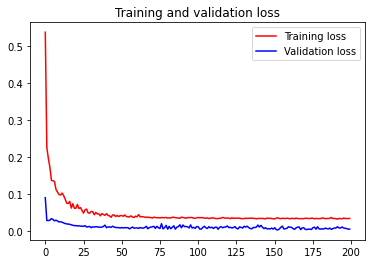

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
### Lets Do the prediction and check performance metrics
pad = np.zeros(time_step)

train_predict1=model1.predict(X1_train).reshape(len(X1_train))
test_predict1=model1.predict(X1_test).reshape(len(X1_test))
print(train_predict1.shape, test_predict1.shape)

train_predict2=model1.predict(X2_train).reshape(len(X2_train))
test_predict2=model1.predict(X2_test).reshape(len(X2_test))
print(train_predict2.shape, test_predict2.shape)

train_predict3=model3.predict(X3_train).reshape(len(X3_train))
test_predict3=model3.predict(X3_test).reshape(len(X3_test))
print(train_predict3.shape, test_predict3.shape)

BTC_pred = np.concatenate((pad, train_predict1, test_predict1), axis=None)
ETH_pred = np.concatenate((pad, train_predict2, test_predict2), axis=None)
DOGE_pred = np.concatenate((pad, train_predict3, test_predict3), axis=None)

print(BTC_pred.shape, ETH_pred.shape, DOGE_pred.shape)
"""
plt.plot(maindf['Date'][:len(y1_train)], maindf['BTC_Open'][:len(y1_train)], label = "Actual price")
plt.plot(maindf['Date'][:len(y1_train)], maindf['BTC_Open'][:len(y1_train)], label = "Actual price")
plt.title('Bitcoin Actual vs. predicted prices')
plt.legend(loc=0)
plt.figure()

plt.show()"""

(568,) (143,)
(568,) (143,)
(568,) (143,)
(731,) (731,) (731,)


'\nplt.plot(maindf[\'Date\'][:len(y1_train)], maindf[\'BTC_Open\'][:len(y1_train)], label = "Actual price")\nplt.plot(maindf[\'Date\'][:len(y1_train)], maindf[\'BTC_Open\'][:len(y1_train)], label = "Actual price")\nplt.title(\'Bitcoin Actual vs. predicted prices\')\nplt.legend(loc=0)\nplt.figure()\n\nplt.show()'

In [ ]:
maindf["BTC_pred"] = pd.DataFrame(BTC_pred)
maindf["ETH_pred"] = pd.DataFrame(ETH_pred)
maindf["DOGE_pred"] = pd.DataFrame(DOGE_pred)

display(maindf)

,index,Date,BTC_Open,BTC_Close,BTC_Volume,BTC_change_factor,ETH_Open,ETH_Close,ETH_Volume,ETH_change_factor,DOGE_Open,DOGE_Close,DOGE_Volume,DOGE_change_factor,btc_newsPosScoreaverage,btc_newsNegScoreaverage,btc_newsComScoreaverage,btc_newsScorecount,eth_newsPosScoreaverage,eth_newsNegScoreaverage,eth_newsComScoreaverage,eth_newsScorecount,doge_newsPosScoreaverage,doge_newsNegScoreaverage,doge_newsComScoreaverage,doge_newsScorecount,cryptocurrency_newsPosScoreaverage,cryptocurrency_newsNegScoreaverage,cryptocurrency_newsComScoreaverage,cryptocurrency_newsScorecount,economy_newsPosScoreaverage,economy_newsNegScoreaverage,economy_newsComScoreaverage,economy_newsScorecount,finance_newsPosScoreaverage,finance_newsNegScoreaverage,finance_newsComScoreaverage,finance_newsScorecount,politics_newsPosScoreaverage,politics_newsNegScoreaverage,...,politics_newsScorecount,pandemic_newsPosScoreaverage,pandemic_newsNegScoreaverage,pandemic_newsComScoreaverage,pandemic_newsScorecount,btc_redditPosScoreaverage,btc_redditNegScoreaverage,btc_redditComScoreaverage,btc_redditScorecount,eth_redditPosScoreaverage,eth_redditNegScoreaverage,eth_redditComScoreaverage,eth_redditScorecount,doge_redditPosScoreaverage,doge_redditNegScoreaverage,doge_redditComScoreaverage,doge_redditScorecount,cryptocurrency_redditPosScoreaverage,cryptocurrency_redditNegScoreaverage,cryptocurrency_redditComScoreaverage,cryptocurrency_redditScorecount,economy_redditPosScoreaverage,economy_redditNegScoreaverage,economy_redditComScoreaverage,economy_redditScorecount,finance_redditPosScoreaverage,finance_redditNegScoreaverage,finance_redditComScoreaverage,finance_redditScorecount,politics_redditPosScoreaverage,politics_redditNegScoreaverage,politics_redditComScoreaverage,politics_redditScorecount,pandemic_redditPosScoreaverage,pandemic_redditNegScoreaverage,pandemic_redditComScoreaverage,pandemic_redditScorecount,BTC_pred,ETH_pred,DOGE_pred
0,0.0,2020-01-31 0:00:00,9508.313477,9350.529297,29432489719,0.983406,184.736908,180.160172,11728616394,0.975226,0.002440,0.002394,76519295,0.981148,0.107909,0.074000,0.126964,11,0.068700,0.021300,0.097690,10,0.000000,0.000000,0.000000,0,0.140000,0.052125,0.189825,8,0.110514,0.073429,0.105009,35,0.031625,0.028375,-0.024538,8,0.069379,0.061897,...,29,0.025357,0.071571,-0.099750,14,0.091350,0.063020,0.222978,100,0.09237,0.03938,0.361353,100,0.116840,0.044750,0.196060,100,0.101440,0.018470,0.365265,100,0.09368,0.097430,-0.038626,100,0.098590,0.057240,0.274926,100,0.10798,0.09278,0.036941,100,0.09918,0.08868,0.015407,100,0.000000,0.000000,0.000000
1,1.0,2020-02-01 0:00:00,9346.357422,9392.875000,25922656496,1.004977,180.113770,183.673950,11569697182,1.019766,0.002391,0.002422,78730830,1.012965,0.036500,0.095000,-0.125188,8,0.080200,0.072400,-0.022620,5,0.000000,0.000000,0.000000,0,0.057857,0.082000,-0.043557,7,0.058800,0.106667,-0.132360,15,0.074067,0.031600,0.086823,30,0.066429,0.063857,...,14,0.000000,0.000000,0.000000,2,0.104100,0.046720,0.305372,100,0.09728,0.02979,0.319943,100,0.123939,0.035697,0.357381,99,0.066210,0.042710,0.144001,100,0.11307,0.102250,0.044050,100,0.110343,0.044788,0.416939,99,0.09337,0.09603,-0.021826,100,0.10269,0.08586,0.097857,100,0.000000,0.000000,0.000000
2,2.0,2020-02-02 0:00:00,9389.820313,9344.365234,30835736946,0.995159,183.532501,188.617538,14054425389,1.027706,0.002421,0.002468,91552515,1.019413,0.107300,0.055000,0.049160,10,0.000000,0.000000,0.000000,3,0.000000,0.000000,0.000000,0,0.026286,0.000000,0.028900,7,0.102857,0.105429,-0.081043,7,0.080417,0.025500,0.106442,12,0.068867,0.087000,...,15,0.046250,0.037250,0.022000,4,0.109400,0.040000,0.342775,100,0.05174,0.02404,0.181080,100,0.141859,0.037778,0.335710,99,0.066630,0.043170,0.157170,100,0.10108,0.086650,0.098146,100,0.109350,0.052070,0.388530,100,0.10146,0.09387,0.043068,100,0.09618,0.11241,0.020461,100,0.000000,0.000000,0.000000
3,3.0,2020-02-03 0:00:00,9344.683594,9293.521484,30934096509,0.994525,188.607407,189.865067,12392875241,1.006668,0.002466,0.0024

In [ ]:
maindf.dropna(subset=['BTC_pred', 'ETH_pred', 'DOGE_pred'])

,index,Date,BTC_Open,BTC_Close,BTC_Volume,BTC_change_factor,ETH_Open,ETH_Close,ETH_Volume,ETH_change_factor,DOGE_Open,DOGE_Close,DOGE_Volume,DOGE_change_factor,btc_newsPosScoreaverage,btc_newsNegScoreaverage,btc_newsComScoreaverage,btc_newsScorecount,eth_newsPosScoreaverage,eth_newsNegScoreaverage,eth_newsComScoreaverage,eth_newsScorecount,doge_newsPosScoreaverage,doge_newsNegScoreaverage,doge_newsComScoreaverage,doge_newsScorecount,cryptocurrency_newsPosScoreaverage,cryptocurrency_newsNegScoreaverage,cryptocurrency_newsComScoreaverage,cryptocurrency_newsScorecount,economy_newsPosScoreaverage,economy_newsNegScoreaverage,economy_newsComScoreaverage,economy_newsScorecount,finance_newsPosScoreaverage,finance_newsNegScoreaverage,finance_newsComScoreaverage,finance_newsScorecount,politics_newsPosScoreaverage,politics_newsNegScoreaverage,...,politics_newsScorecount,pandemic_newsPosScoreaverage,pandemic_newsNegScoreaverage,pandemic_newsComScoreaverage,pandemic_newsScorecount,btc_redditPosScoreaverage,btc_redditNegScoreaverage,btc_redditComScoreaverage,btc_redditScorecount,eth_redditPosScoreaverage,eth_redditNegScoreaverage,eth_redditComScoreaverage,eth_redditScorecount,doge_redditPosScoreaverage,doge_redditNegScoreaverage,doge_redditComScoreaverage,doge_redditScorecount,cryptocurrency_redditPosScoreaverage,cryptocurrency_redditNegScoreaverage,cryptocurrency_redditComScoreaverage,cryptocurrency_redditScorecount,economy_redditPosScoreaverage,economy_redditNegScoreaverage,economy_redditComScoreaverage,economy_redditScorecount,finance_redditPosScoreaverage,finance_redditNegScoreaverage,finance_redditComScoreaverage,finance_redditScorecount,politics_redditPosScoreaverage,politics_redditNegScoreaverage,politics_redditComScoreaverage,politics_redditScorecount,pandemic_redditPosScoreaverage,pandemic_redditNegScoreaverage,pandemic_redditComScoreaverage,pandemic_redditScorecount,BTC_pred,ETH_pred,DOGE_pred
0,0.0,2020-01-31 0:00:00,9508.313477,9350.529297,29432489719,0.983406,184.736908,180.160172,11728616394,0.975226,0.002440,0.002394,76519295,0.981148,0.107909,0.074000,0.126964,11,0.068700,0.021300,0.097690,10,0.000000,0.000000,0.000000,0,0.140000,0.052125,0.189825,8,0.110514,0.073429,0.105009,35,0.031625,0.028375,-0.024538,8,0.069379,0.061897,...,29,0.025357,0.071571,-0.099750,14,0.091350,0.063020,0.222978,100,0.09237,0.03938,0.361353,100,0.116840,0.044750,0.196060,100,0.101440,0.018470,0.365265,100,0.09368,0.097430,-0.038626,100,0.098590,0.057240,0.274926,100,0.10798,0.09278,0.036941,100,0.09918,0.08868,0.015407,100,0.000000,0.000000,0.000000
1,1.0,2020-02-01 0:00:00,9346.357422,9392.875000,25922656496,1.004977,180.113770,183.673950,11569697182,1.019766,0.002391,0.002422,78730830,1.012965,0.036500,0.095000,-0.125188,8,0.080200,0.072400,-0.022620,5,0.000000,0.000000,0.000000,0,0.057857,0.082000,-0.043557,7,0.058800,0.106667,-0.132360,15,0.074067,0.031600,0.086823,30,0.066429,0.063857,...,14,0.000000,0.000000,0.000000,2,0.104100,0.046720,0.305372,100,0.09728,0.02979,0.319943,100,0.123939,0.035697,0.357381,99,0.066210,0.042710,0.144001,100,0.11307,0.102250,0.044050,100,0.110343,0.044788,0.416939,99,0.09337,0.09603,-0.021826,100,0.10269,0.08586,0.097857,100,0.000000,0.000000,0.000000
2,2.0,2020-02-02 0:00:00,9389.820313,9344.365234,30835736946,0.995159,183.532501,188.617538,14054425389,1.027706,0.002421,0.002468,91552515,1.019413,0.107300,0.055000,0.049160,10,0.000000,0.000000,0.000000,3,0.000000,0.000000,0.000000,0,0.026286,0.000000,0.028900,7,0.102857,0.105429,-0.081043,7,0.080417,0.025500,0.106442,12,0.068867,0.087000,...,15,0.046250,0.037250,0.022000,4,0.109400,0.040000,0.342775,100,0.05174,0.02404,0.181080,100,0.141859,0.037778,0.335710,99,0.066630,0.043170,0.157170,100,0.10108,0.086650,0.098146,100,0.109350,0.052070,0.388530,100,0.10146,0.09387,0.043068,100,0.09618,0.11241,0.020461,100,0.000000,0.000000,0.000000
3,3.0,2020-02-03 0:00:00,9344.683594,9293.521484,30934096509,0.994525,188.607407,189.865067,12392875241,1.006668,0.002466,0.0024

In [ ]:
maindf.to_csv("MPD.csv", index=False)

- # Model Evaluation

In [ ]:
# Transform back to original form

"""train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))""" 

- ## Evaluation metrices RMSE, MSE and MAE

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train,train_predict)))
print("Train data MSE: ", mean_squared_error(y_train,train_predict))
print("Train data MAE: ", mean_absolute_error(y_train,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,test_predict)))
print("Test data MSE: ", mean_squared_error(y_test,test_predict))
print("Test data MAE: ", mean_absolute_error(y_test,test_predict))

NameError: ignored

- ## Variance Regression Score

In [ ]:
print("Train data explained variance regression score:", 
      explained_variance_score(y1, BTC_pred[20:]))
"""print("Test data explained variance regression score:", 
      explained_variance_score(, t))"""

Train data explained variance regression score: -1.331739393975127


'print("Test data explained variance regression score:", \n      explained_variance_score(, t))'

- ## R square score for regression

In [ ]:
print("Train data R2 score:", r2_score(y1_train, BTC_pred))
print("Test data R2 score:", r2_score(y1_test, test_predict))

- ## Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [ ]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

- # Comparision of original stock close price and predicted close price

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['BTC_Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

- # Predicting next 30 days

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

NameError: ignored

- # Plotting last 15 days of dataset and next predicted 30 days

In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()



- # Plotting entire Closing Stock Price with next 30 days period of prediction

In [ ]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Thats it we are Done with Bitcoin Price Prediction using LSTM.